# Upper-bound Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance

In [3]:
base_dir = "trained_models/"
# base_dir = "trained_models/backup/"
# base_dir = "trained_models/backup_10epochs/"
# base_dir = "trained_models/backup_20epochs_50sample/"
# base_dir = "trained_models/backup_30epochs_50sample/"
def load_data(train, test, fname) :
    fpath = base_dir + "{}/eval/{}/{}.txt".format(train, test, fname)
    return np.loadtxt(fpath).astype(np.int)

train = "autoattack"
test = "pgd"

y_original = load_data(train, test, "Y_original")
y_original_pred = load_data(train, test, "Y_original_pred")
y_adv = load_data(train, test, "Y_adv")
y_adv_pred = load_data(train, test, "Y_adv_pred")

In [4]:
def get_robust_data(train, test):
    y_adv = load_data(train, test, "Y_adv")
    y_adv_pred = load_data(train, test, "Y_adv_pred")
    return y_adv, y_adv_pred

test = "autoattack"
y_adv, y_adv_pred = get_robust_data(train, test)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(autoattack,autoattack): [3 8 8 ... 5 1 7]
Y_adv_pred(autoattack,autoattack): [5 8 8 ... 5 1 7]


In [5]:
attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack", "spatialtransformation"]

In [6]:
train = attacks.copy()

test = attacks.copy()
test.append("all")

In [7]:
predictions = {}
labels = {}

for a1 in train :
    p = np.array([])
    l = np.array([])
    for a2 in attacks :
        y, y_pred = get_robust_data(a1, a2)
        p = np.concatenate((p, y_pred))
        l = np.concatenate((l, y))
    predictions[a1] = {}
    labels[a1] = {}
    predictions[a1]["all"] = p
    labels[a1]["all"] = l

for a1 in train :
    for a2 in attacks :
        y, y_pred = get_robust_data(a1, a2)
        predictions[a1][a2] = y_pred
        labels[a1][a2] = y

In [8]:
# predictions

In [9]:
# labels

In [41]:
pd.options.display.float_format = '{:,.3f}'.format

In [42]:
accs = {}
for tr in train :
    accs[tr] = {}
    for ts in test :
        accs[tr][ts] = (labels[tr][ts] == predictions[tr][ts]).sum().item() / len(labels[tr][ts])

    
accs = pd.DataFrame(data=accs).T
accs

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation,all
autoattack,0.788,0.786,0.783,0.792,0.751,0.779,0.779,0.790,0.784,0.121,0.410,0.688
autopgd,0.784,0.784,0.777,0.790,0.751,0.775,0.778,0.785,0.779,0.132,0.345,0.680
bim,0.784,0.782,0.784,0.790,0.755,0.782,0.781,0.790,0.784,0.119,0.383,0.685
cw,0.789,0.789,0.787,0.808,0.752,0.786,0.793,0.803,0.800,0.114,0.389,0.692
fgsm,0.777,0.776,0.777,0.786,0.765,0.775,0.779,0.783,0.778,0.158,0.360,0.683
pgd,0.776,0.779,0.775,0.782,0.751,0.775,0.775,0.781,0.777,0.138,0.362,0.679
deepfool,0.782,0.780,0.776,0.796,0.761,0.773,0.791,0.793,0.785,0.097,0.390,0.684
newtonfool,0.782,0.784,0.779,0.801,0.750,0.777,0.789,0.800,0.793,0.106,0.382,0.686
squareattack,0.734,0.737,0.734,0.797,0.691,0.726,0.754,0.789,0.830,0.103,0.383,0.662
pixelattack,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.799,0.100,0.164


In [43]:
sorted_acc = accs.sort_values(by="all", ascending=False)
sorted_acc

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation,all
cw,0.789,0.789,0.787,0.808,0.752,0.786,0.793,0.803,0.800,0.114,0.389,0.692
autoattack,0.788,0.786,0.783,0.792,0.751,0.779,0.779,0.790,0.784,0.121,0.410,0.688
newtonfool,0.782,0.784,0.779,0.801,0.750,0.777,0.789,0.800,0.793,0.106,0.382,0.686
bim,0.784,0.782,0.784,0.790,0.755,0.782,0.781,0.790,0.784,0.119,0.383,0.685
deepfool,0.782,0.780,0.776,0.796,0.761,0.773,0.791,0.793,0.785,0.097,0.390,0.684
fgsm,0.777,0.776,0.777,0.786,0.765,0.775,0.779,0.783,0.778,0.158,0.360,0.683
autopgd,0.784,0.784,0.777,0.790,0.751,0.775,0.778,0.785,0.779,0.132,0.345,0.680
pgd,0.776,0.779,0.775,0.782,0.751,0.775,0.775,0.781,0.777,0.138,0.362,0.679
squareattack,0.734,0.737,0.734,0.797,0.691,0.726,0.754,0.789,0.830,0.103,0.383,0.662
spatialtransformation,0.510,0.509,0.507,0.544,0.499,0.507,0.509,0.544,0.549,0.140,0.818,0.512


In [67]:
idx = list(sorted_acc.index)
idx.append("all")
sorted_acc = sorted_acc.reindex(idx, axis=1)
sorted_acc

,cw,autoattack,newtonfool,bim,deepfool,fgsm,autopgd,pgd,squareattack,spatialtransformation,pixelattack,all
cw,0.808,0.789,0.803,0.787,0.793,0.752,0.789,0.786,0.800,0.389,0.114,0.692
autoattack,0.792,0.788,0.790,0.783,0.779,0.751,0.786,0.779,0.784,0.410,0.121,0.688
newtonfool,0.801,0.782,0.800,0.779,0.789,0.750,0.784,0.777,0.793,0.382,0.106,0.686
bim,0.790,0.784,0.790,0.784,0.781,0.755,0.782,0.782,0.784,0.383,0.119,0.685
deepfool,0.796,0.782,0.793,0.776,0.791,0.761,0.780,0.773,0.785,0.390,0.097,0.684
fgsm,0.786,0.777,0.783,0.777,0.779,0.765,0.776,0.775,0.778,0.360,0.158,0.683
autopgd,0.790,0.784,0.785,0.777,0.778,0.751,0.784,0.775,0.779,0.345,0.132,0.680
pgd,0.782,0.776,0.781,0.775,0.775,0.751,0.779,0.775,0.777,0.362,0.138,0.679
squareattack,0.797,0.734,0.789,0.734,0.754,0.691,0.737,0.726,0.830,0.383,0.103,0.662
spatialtransformation,0.544,0.510,0.544,0.507,0.509,0.499,0.509,0.507,0.549,0.818,0.140,0.512


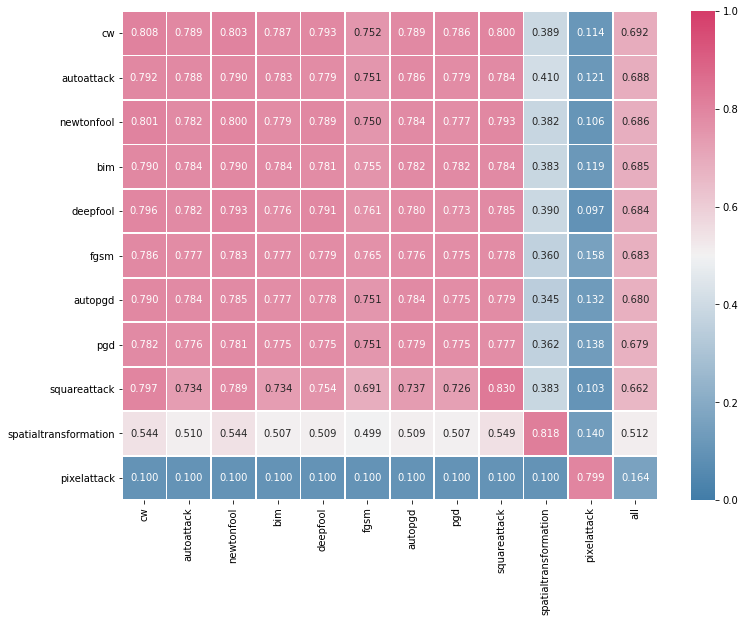

In [68]:
def plot_heatmap(metrics, cmap, fpath, vmin, vmax, annot=True): 

    df = pd.DataFrame(data=metrics)

    plt.figure(figsize=(12,9))
    
    fig = sns.heatmap(df, cmap=cmap, vmin=vmin, vmax=vmax, annot=annot, fmt=".3f", linewidth=0.7)
#     fig.set(xlabel='Train', ylabel='Test')
    fig.figure.savefig(fpath, bbox_inches='tight')
    plt.show()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(h_neg=240, h_pos=0,s=75, l=50, n=1, as_cmap=True)

path = "plot/awp-accuracy.png"

plot_heatmap(sorted_acc,cmap, path, 0, 1)

In [46]:
print(sorted_acc.to_latex(bold_rows=True))

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  autoattack &  autopgd &   bim &    cw &  fgsm &   pgd &  deepfool &  newtonfool &  squareattack &  pixelattack &  spatialtransformation &   all \\
\midrule
\textbf{cw                   } &       0.789 &    0.789 & 0.787 & 0.808 & 0.752 & 0.786 &     0.793 &       0.803 &         0.800 &        0.114 &                  0.389 & 0.692 \\
\textbf{autoattack           } &       0.788 &    0.786 & 0.783 & 0.792 & 0.751 & 0.779 &     0.779 &       0.790 &         0.784 &        0.121 &                  0.410 & 0.688 \\
\textbf{newtonfool           } &       0.782 &    0.784 & 0.779 & 0.801 & 0.750 & 0.777 &     0.789 &       0.800 &         0.793 &        0.106 &                  0.382 & 0.686 \\
\textbf{bim                  } &       0.784 &    0.782 & 0.784 & 0.790 & 0.755 & 0.782 &     0.781 &       0.790 &         0.784 &        0.119 &                  0.383 & 0.685 \\
\textbf{deepfool             } &       0.782 &    0.780 & 0.776 & 0.796 & 

## Time Execution Measurement

In [14]:
import datetime

def get_adv_train_time_execution(train) :
    fpath = base_dir + "{}/output.log".format(train)

    
    file = open(fpath)
    lines = file.readlines()
    file.close()
    
    start_time = None
    end_time = None
    
    datefmt='%Y/%m/%d %H:%M:%S'
    
    
    for l in lines :
        token = l.split("-")
        date_str = token[0][1:-2]
        date_time = datetime.datetime.strptime(date_str, datefmt)
        if token[1][1:11] == "Namespace(" :
            start_time = date_time
        else :
            end_time = date_time
    
    if end_time > start_time :
        return end_time-start_time
    raise ValueError("Duration not found")
    
# _train = "autoattack"
# _train = "all"
# get_adv_train_time_execution(_train) + get_adv_train_time_execution("fgsm") 

In [15]:
durations = []
for tr in train :
    if tr[:7] == "combine" :
        duration = None
        for i in range(len(attacks)) :
            a = attacks[i]
            if i == 0 :
                duration = get_adv_train_time_execution(a)
            else :
                duration += get_adv_train_time_execution(a)
        duration+= get_adv_train_time_execution(tr)
        durations.append(duration)
    else :
        durations.append(get_adv_train_time_execution(tr))

accs["duration"] = durations

In [16]:
accs["all"]
# accs

autoattack               0.687618
autopgd                  0.679955
bim                      0.684900
cw                       0.691845
fgsm                     0.683045
pgd                      0.679227
deepfool                 0.684036
newtonfool               0.685736
squareattack             0.661755
pixelattack              0.163509
spatialtransformation    0.512345
Name: all, dtype: float64

In [17]:
sorted_acc = accs.sort_values(by="all", ascending=False)
sorted_acc

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation,all,duration
cw,0.7891,0.7886,0.7871,0.8083,0.7518,0.7862,0.7929,0.8034,0.7999,0.1140,0.3890,0.691845,0 days 01:44:05
autoattack,0.7885,0.7864,0.7829,0.7922,0.7510,0.7786,0.7787,0.7902,0.7842,0.1209,0.4102,0.687618,0 days 01:59:04
newtonfool,0.7819,0.7842,0.7793,0.8015,0.7500,0.7768,0.7892,0.7997,0.7927,0.1056,0.3822,0.685736,0 days 01:59:15
bim,0.7839,0.7816,0.7838,0.7902,0.7548,0.7824,0.7808,0.7902,0.7839,0.1190,0.3833,0.684900,0 days 01:44:02
deepfool,0.7825,0.7805,0.7758,0.7958,0.7608,0.7727,0.7910,0.7934,0.7849,0.0972,0.3898,0.684036,0 days 01:44:35
fgsm,0.7774,0.7756,0.7768,0.7856,0.7649,0.7754,0.7792,0.7827,0.7777,0.1583,0.3599,0.683045,0 days 00:53:33
autopgd,0.7839,0.7838,0.7767,0.7899,0.7508,0.7753,0.7783,0.7849,0.7787,0.1322,0.3450,0.679955,0 days 01:44:51
pgd,0.7758,0.7793,0.7753,0.7816,0.7515,0.7751,0.7746,0.7813,0.7770,0.1379,0.3621,0.679227,0 days 01:44:21
squareattack,0.7343,0.7369,0.7338,0.7971,0.6910,0.7264,0.7544,0.7887,0.8299,0.1035,0.3833,0.661755,0 days 01:44:32
spatialtransformation,0.5099,0.5088,0.5068,0.5444,0.4987,0.5073,0.5094,0.5441,0.5487,0.1399,0.8178,0.512345,0 days 01:44:08


In [18]:
selected_sorted_acc = sorted_acc[:][["all", "duration"]]
selected_sorted_acc.rename(columns={"all":"test_on_all_adv"})

,test_on_all_adv,duration
cw,0.691845,0 days 01:44:05
autoattack,0.687618,0 days 01:59:04
newtonfool,0.685736,0 days 01:59:15
bim,0.684900,0 days 01:44:02
deepfool,0.684036,0 days 01:44:35
fgsm,0.683045,0 days 00:53:33
autopgd,0.679955,0 days 01:44:51
pgd,0.679227,0 days 01:44:21
squareattack,0.661755,0 days 01:44:32
spatialtransformation,0.512345,0 days 01:44:08


In [28]:
# 3 classes
# _clusters = {1: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool', 'squareattack'], 0: ['pixelattack'], 2: ['spatialtransformation']}

# 4 classes
_clusters = {3: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool'], 1: ['squareattack'], 0: ['pixelattack'], 2: ['spatialtransformation']}

In [29]:
clusters = []
for member in _clusters.values() :
    cluster = {}
    cluster["member"] = member
    centroid = member[0]
    acc = sorted_acc["all"][centroid]
    for x in member :
        if sorted_acc["all"][x] > acc :
            centroid = x
            acc = sorted_acc["all"][x]
    cluster["centroid"] = centroid
    clusters.append(cluster)

print(clusters)

[{'member': ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool'], 'centroid': 'cw'}, {'member': ['squareattack'], 'centroid': 'squareattack'}, {'member': ['pixelattack'], 'centroid': 'pixelattack'}, {'member': ['spatialtransformation'], 'centroid': 'spatialtransformation'}]


In [30]:
upper_bound = 0
n = 0
for c in clusters :
    centroid = c["centroid"]
    for m in c["member"] :
        upper_bound += sorted_acc[m][centroid]
        n += 1
print("Upper bound: ", upper_bound/n)

Upper bound:  0.7957909090909091


### Execution Time of The Ensemble Model

In [47]:
def get_execution_time(fpath) :
    
    file = open(fpath)
    lines = file.readlines()
    file.close()
    
    start_time = None
    end_time = None
    
    datefmt='%Y/%m/%d %H:%M:%S'
    
    
    for l in lines :
        token = l.split("-")
        date_str = token[0][1:-2]
        date_time = datetime.datetime.strptime(date_str, datefmt)
        if token[1][1:11] == "Namespace(" :
            start_time = date_time
        else :
            end_time = date_time
    
    if end_time > start_time :
        return end_time-start_time
    raise ValueError("Duration not found")

In [51]:
duration = None
for i in range(len(attacks)) :
    a = attacks[i]
    fpath = "trained_models/" + a + "/output.log"
    if i == 0 :
        duration = get_execution_time(fpath)
    else :
        duration += get_execution_time(fpath)

fpath = "noise_predictors/resnet18_3_pixelattack_spatialtransformation_cw_piecewise_eps8_bs128_maxlr0.1_wd0.0001_ls0.3_BNeval/output.log"
duration += get_execution_time(fpath)

fpath = "ensemble_models/pixelattack_spatialtransformation_cw/eval/all/output.log"
duration += get_execution_time(fpath)

days_and_time = duration
days = days_and_time.days
seconds = days_and_time.seconds

hours = seconds//3600
minutes = (seconds//60)%60
print("days:", days, "\nhours:", hours, "\nminutes:", minutes)

days: 0 
hours: 20 
minutes: 15
